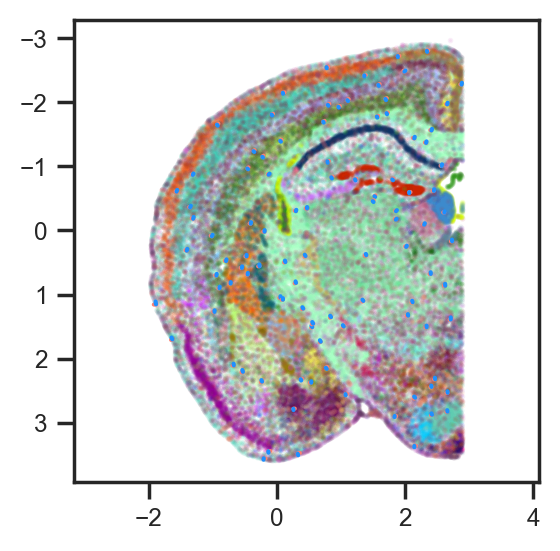

In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from txtox.utils import get_paths

paths = get_paths()

custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style="ticks", font_scale=0.8, rc=custom_params)
%config InlineBackend.figure_format="retina"

data = pickle.load(open(paths["data_root"] + f"het_reg_2d_one_sec_hemi_results.pkl", "rb"))

ind = np.where(data["section_idx"] > -np.inf)[0]
f, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.scatter(data["xy"][ind, 0], data["xy"][ind, 1], s=1, c=data["subclass_color"][ind], alpha=0.1)
arrow_ind = np.random.choice(ind, 100, replace=False)
scale = 0.2
colors = ["salmon", "dodgerblue"]
for arr in arrow_ind:
    point = data["xy"][arr]
    for j in range(2):
        vec = data["eigvecs"][arr, :, j]
        lam = data["eigvals"][arr, j] ** 0.5  # get sigma from var
        ax.plot(
            [point[0], point[0] + vec[0] * lam * scale],
            [point[1], point[1] + vec[1] * lam * scale],
            c=colors[j],
            alpha=1,
        )
ax.axis("equal")
ax.invert_yaxis()
plt.show()

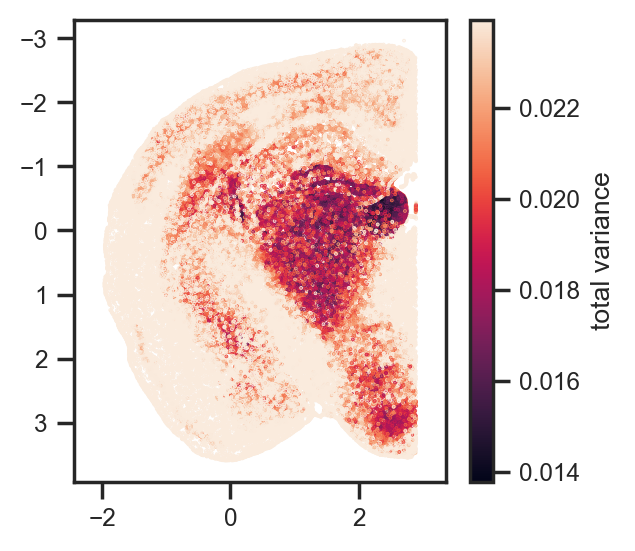

In [2]:
total_var = np.sum(data["eigvals"], axis=1)
f, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.scatter(
    data["xy"][:, 0],
    data["xy"][:, 1],
    s=0.1,
    c=total_var,
    alpha=1,
    cmap="rocket",
    vmin=total_var.min(),
    vmax=total_var.max() / 4,
)
sm = plt.cm.ScalarMappable(cmap="rocket", norm=plt.Normalize(vmin=total_var.min(), vmax=total_var.max() / 4))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label="total variance")
ax.axis("equal")
ax.invert_yaxis()
plt.show()

In [3]:
# make a datatable with subclass and total_var
df = pd.DataFrame({"subclass": data["subclass"], "total_var": total_var})

# calculate the mean eig_mag for each subclass
df_mean = df.groupby("subclass", observed=True).mean().reset_index()

# sort by total_var
df_mean = df_mean.sort_values("total_var", ascending=True)
df_mean = df_mean.reset_index(drop=True)
display(df_mean.head(10))

,subclass,total_var
0,146 LH Pou4f1 Sox1 Glut,0.016023
1,145 MH Tac2 Glut,0.016330
2,155 PRC-PAG Pax6 Glut,0.017168
3,037 DG Glut,0.017616
4,222 PB Evx2 Glut,0.017717
5,129 VMH Nr5a1 Glut,0.019172
6,321 Astroependymal NN,0.019515
7,038 DG-PIR Ex IMN,0.019579
8,151 TH Prkcd Grin2c Glut,0.019997
9,128 VMH Fezf1 Glut,0.020135


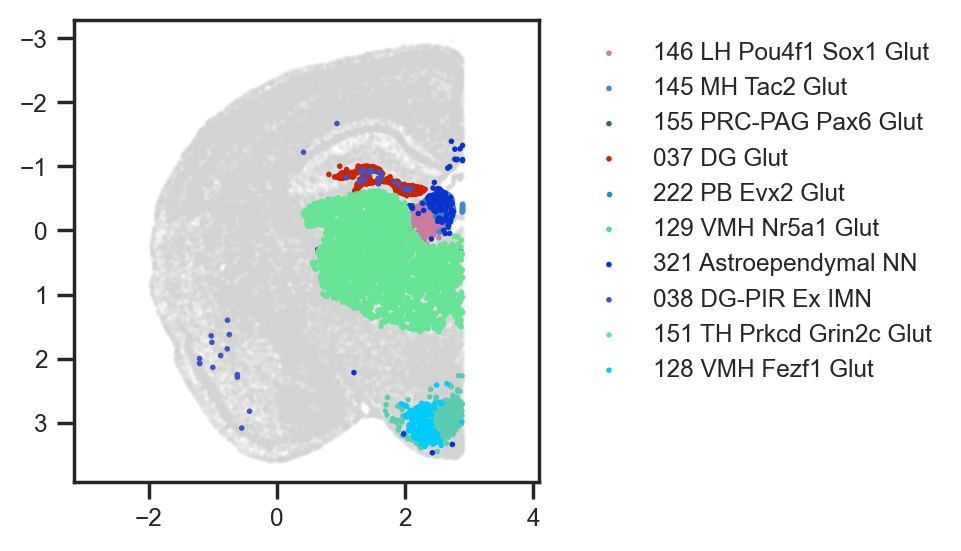

In [4]:
# show top_k local subclasses
top_k = 10
f, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.scatter(data["xy"][:, 0], data["xy"][:, 1], s=1, c="lightgray", alpha=0.1)
for subclass in df_mean["subclass"][:top_k]:
    ind = np.where(data["subclass"] == subclass)[0]
    ax.scatter(data["xy"][ind, 0], data["xy"][ind, 1], s=1, c=data["subclass_color"][ind], alpha=1, label=subclass)
ax.legend()
# put legend outside the plot, and remove the frame
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", frameon=False)
# rasterize plot

ax.axis("equal")
ax.invert_yaxis()
plt.show()

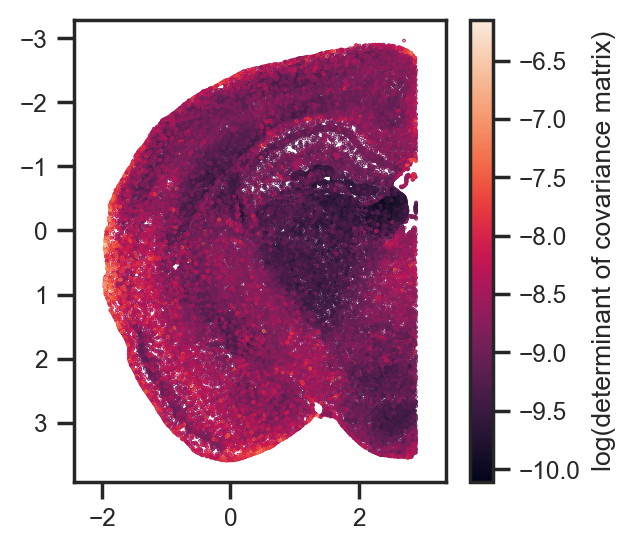

In [5]:
# calculate magnitude as determinant of covariance matrix
eig_mag = np.log(np.linalg.det(data["xy_cov_pred"]))
f, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.scatter(
    data["xy"][:, 0], data["xy"][:, 1], s=0.1, c=eig_mag, alpha=1, cmap="rocket", vmin=eig_mag.min(), vmax=eig_mag.max()
)
sm = plt.cm.ScalarMappable(cmap="rocket", norm=plt.Normalize(vmin=eig_mag.min(), vmax=eig_mag.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label="log(determinant of covariance matrix)")
ax.axis("equal")
ax.invert_yaxis()
plt.show()